<a href="https://colab.research.google.com/github/surabhipandey/6nomad/blob/master/ieeeFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [3]:

# Import kaggle.json from google drive
# This snippet will output a link which needs authentication from any google account
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
    q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
# print(kaggle_api_key)
filename = "/root/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)
#view rawcolab_helper_1.py hosted with ❤ by GitHub

Download 100%.


In [4]:
#!kaggle datasets download -d stanfordu/street-view-house-numbers -w -f street-view-house-numbers.zip
# Unzip the data
!kaggle competitions download -c ieee-fraud-detection
!unzip train_transaction.csv.zip
!unzip train_identity.csv.zip
!unzip test_transaction.csv.zip
!unzip test_identity.csv.zip
#!unzip train.zip
# Use this command to view your files
!ls

 70% 37.0M/52.5M [00:02<00:01, 9.58MB/s]
100% 52.5M/52.5M [00:02<00:00, 19.9MB/s]
  0% 0.00/3.02M [00:00<?, ?B/s]
100% 3.02M/3.02M [00:00<00:00, 99.9MB/s]
 99% 47.0M/47.3M [00:00<00:00, 45.4MB/s]
100% 47.3M/47.3M [00:00<00:00, 57.3MB/s]
  0% 0.00/2.97M [00:00<?, ?B/s]
100% 2.97M/2.97M [00:00<00:00, 202MB/s]
  0% 0.00/1.14M [00:00<?, ?B/s]
100% 1.14M/1.14M [00:00<00:00, 164MB/s]
Archive:  train_transaction.csv.zip
  inflating: train_transaction.csv   
Archive:  train_identity.csv.zip
  inflating: train_identity.csv      
Archive:  test_transaction.csv.zip
  inflating: test_transaction.csv    
Archive:  test_identity.csv.zip
  inflating: test_identity.csv       
adc.json		   test_identity.csv.zip     train_identity.csv.zip
sample_data		   test_transaction.csv      train_transaction.csv
sample_submission.csv.zip  test_transaction.csv.zip  train_transaction.csv.zip
test_identity.csv	   train_identity.csv


In [0]:
# Importing modules
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os, random, cv2
%matplotlib inline

train_trans_df = pd.read_csv('train_transaction.csv')
test_trans_df = pd.read_csv('test_transaction.csv')
train_identity_df = pd.read_csv('train_identity.csv')
test_identity_df  = pd.read_csv('test_identity.csv')

In [0]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y
  
def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y

In [0]:
import seaborn as sns
columns = [x for x in train_trans_df.columns if not x.startswith('V')]
temp_frame= pd.DataFrame(train_trans_df, columns=columns)
#temp_frame.info(verbose=True)
# print(temp_frame.head(10))
# for i in range(0, len(temp_frame.columns), 5):
#     sns.pairplot(data=temp_frame,
#                 x_vars=temp_frame.columns[i:i+5],
#                 y_vars=['isFraud'])

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


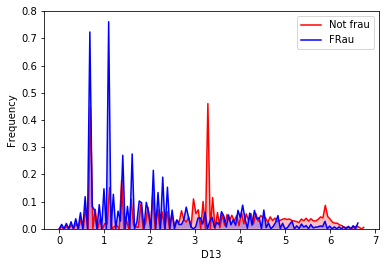

In [17]:
g = sns.kdeplot(np.log(1 + temp_frame.D13[(temp_frame["isFraud"] == 0)]), color="Red", shade = True)
g = sns.kdeplot(np.log(1 + temp_frame.D13[(temp_frame["isFraud"] == 1)]), ax =g, color="Blue", shade= True)
g.set_xlabel("D13")
g.set_ylabel("Frequency")
g = g.legend(["Not frau","FRau"])

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


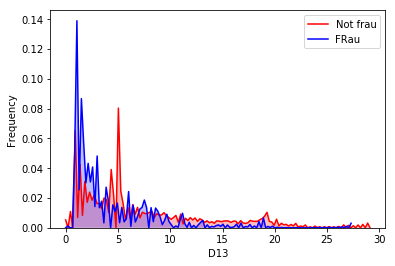

In [25]:
import seaborn as sns
g = sns.kdeplot((temp_frame.D13[(temp_frame["isFraud"] == 0)])**(1/2), color="Red", shade = True)
g = sns.kdeplot((temp_frame.D13[(temp_frame["isFraud"] == 1)])**(1/2), ax =g, color="Blue", shade= True)
g.set_xlabel("D13")
g.set_ylabel("Frequency")
g = g.legend(["Not frau","FRau"])

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


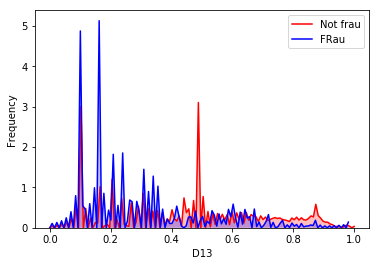

In [26]:
helpful_log = np.log(temp_frame.D13 + 1)
helpful_log_normalized = normalize(helpful_log)
g = sns.kdeplot(helpful_log_normalized[(temp_frame["isFraud"] == 0) ], color="Red", shade = True)
g = sns.kdeplot(helpful_log_normalized[(temp_frame["isFraud"] == 1) ], ax =g, color="Blue", shade= True)
g.set_xlabel("D13")
g.set_ylabel("Frequency")
g = g.legend(["Not frau","FRau"])

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


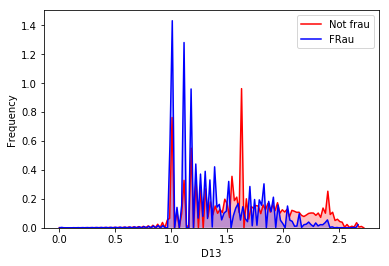

In [27]:
log_max = np.log(temp_frame.D13.max())
helpful_log_max_root = temp_frame.D13**(1/log_max)
g = sns.kdeplot(helpful_log_max_root[(temp_frame["isFraud"] == 0) ], color="Red", shade = True)
g = sns.kdeplot(helpful_log_max_root[(temp_frame["isFraud"] == 1) ], ax =g, color="Blue", shade= True)
g.set_xlabel("D13")
g.set_ylabel("Frequency")
g = g.legend(["Not frau","FRau"])

ValueError: ignored

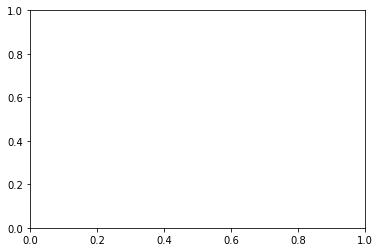

In [28]:
hyperbolic_tangent = np.tanh(temp_frame.D13)
g = sns.kdeplot(np.tanh([(temp_frame["isFraud"] == 0) ]), color="Red", shade = True)
g = sns.kdeplot(np.tanh([(temp_frame["isFraud"] == 1) ]), ax =g, color="Blue", shade= True)
g.set_xlabel("D13")
g.set_ylabel("Frequency")
g = g.legend(["Not frau","FRau"])

# New Section

In [0]:
#@title Introducing Colaboratory { display-mode: "form" }
#@markdown This 3-minute video gives an overview of the key features of Colaboratory:
from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI', width=600, height=400)

## Getting Started

The document you are reading is a  [Jupyter notebook](https://jupyter.org/), hosted in Colaboratory. It is not a static page, but an interactive environment that lets you write and execute code in Python and other languages.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [0]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter".

All cells modify the same global state, so variables that you define by executing a cell can be used in other cells:

In [0]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

For more information about working with Colaboratory notebooks, see [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb).


## More Resources

Learn how to make the most of Python, Jupyter, Colaboratory, and related tools with these resources:

### Working with Notebooks in Colaboratory
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

## Machine Learning Examples: Seedbank

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out the [Seedbank](https://research.google.com/seedbank/) project.

A few featured examples:

- [Neural Style Transfer](https://research.google.com/seedbank/seed/neural_style_transfer_with_tfkeras): Use deep learning to transfer style between images.
- [EZ NSynth](https://research.google.com/seedbank/seed/ez_nsynth): Synthesize audio with WaveNet auto-encoders.
- [Fashion MNIST with Keras and TPUs](https://research.google.com/seedbank/seed/fashion_mnist_with_keras_and_tpus): Classify fashion-related images with deep learning.
- [DeepDream](https://research.google.com/seedbank/seed/deepdream): Produce DeepDream images from your own photos.
- [Convolutional VAE](https://research.google.com/seedbank/seed/convolutional_vae): Create a generative model of handwritten digits.

In [0]:
!pip install kaggle
